<a href="https://colab.research.google.com/github/JSEFERINO/CURSO5/blob/main/Taller_Datos_agrupados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller Datos agrupados

1. Medidas de tendencia central:
Media: 64.42
Mediana: 64.0
Moda: [65]

2. Medidas de posición:
Q1: 55.00
Q3: 70.25
D3: 58.00
D8: 74.00

Interpretación:
Q1: 25% de los pesos son ≤ 55.00
Q3: 75% de los pesos son ≤ 70.25
D3: 30% de los pesos son ≤ 58.00
D8: 80% de los pesos son ≤ 74.00



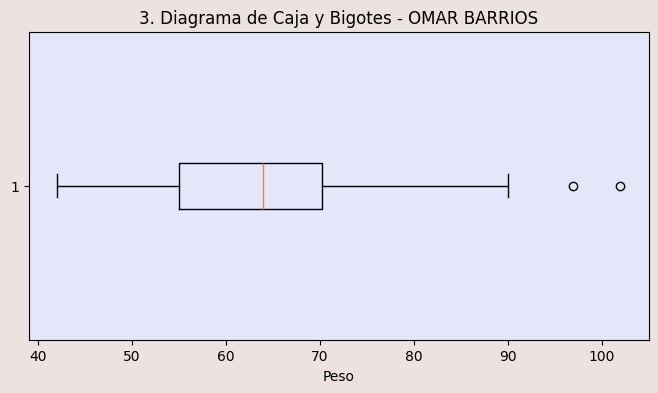



3. Valores atípicos: [97, 102] 

4. Tabla de frecuencias agrupadas:
    Intervalo  Frecuencia Absoluta    xi  Frecuencia Relativa  Frecuencia Acumulada  Frecuencia Relativa Acumulada Frecuencia Relativa Acumulada Porcentual
 [42.0, 50.0)                    9  46.0             0.066176                     9                       6.617647                                    6.62%
 [50.0, 58.0)                   31  54.0             0.227941                    40                      29.411765                                   29.41%
 [58.0, 66.0)                   44  62.0             0.323529                    84                      61.764706                                   61.76%
 [66.0, 74.0)                   23  70.0             0.169118                   107                      78.676471                                   78.68%
 [74.0, 82.0)                   18  78.0             0.132353                   125                      91.911765                                   9

<ipython-input-1-aa5a0daeaa73>:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = df.groupby('Intervalo').size().reset_index(name='Frecuencia Absoluta')


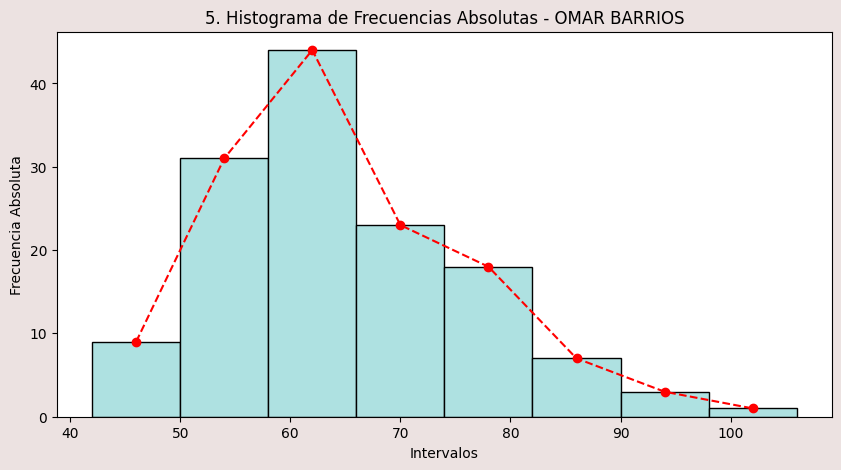

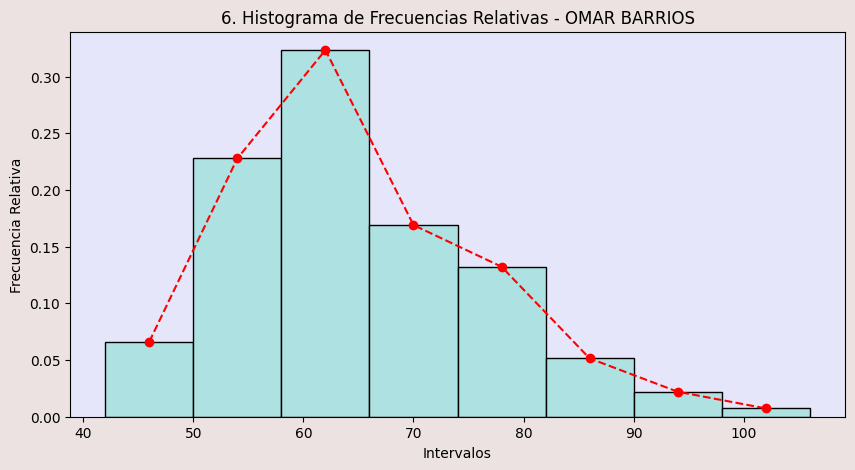

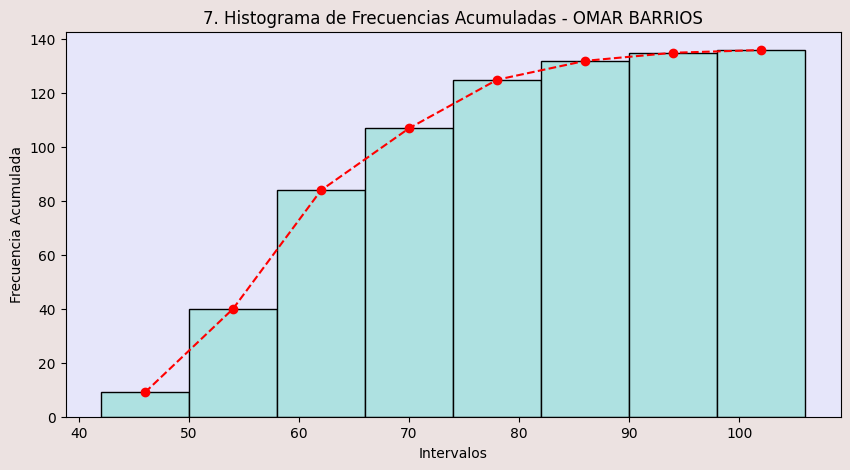



8. Medidas agrupadas:
Media: 64.82
Mediana: 63.09
Moda: 61.06

9. Medidas de posición agrupadas:
Q1: 56.45
Q3: 72.26
D3: 58.15
D8: 74.80

10. Intervalo de Confianza del 95%: (62.47, 66.37)
Interpretación: Con 95% de confianza, la media real está entre los valores indicados.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import stats

# Datos proporcionados
pesos = [45,56,67,69,50,61,50,59,70,73,
65,65,57,70,80,70,62,57,60,58,
65,72,77,71,48,90,67,55,67,72,
67,102,55,60,60,75,76,55,48,88,
50,59,60,60,64,53,49,70,80,42,
59,64,65,80,62,55,60,53,62,69,
60,76,78,70,78,52,55,48,82,65,
65,50,50,54,55,60,71,70,69,76,
88,55,56,63,64,69,62,70,60,65,
51,66,78,52,75,65,87,65,88,74,
97,77,59,85,65,65,65,60,58,55,
65,67,60,90,75,50,75,60,74,53,
76,85,54,65,50,52,64,46,49,64,
50,68,49,60,52,55]

df = pd.DataFrame(pesos, columns=['Peso'])

# 1. Medidas de tendencia central para datos individuales
mean_ind = df['Peso'].mean()
median_ind = df['Peso'].median()
mode_ind = df['Peso'].mode().tolist()

print("1. Medidas de tendencia central:")
print(f"Media: {mean_ind:.2f}")
print(f"Mediana: {median_ind}")
print(f"Moda: {mode_ind}\n")

# 2. Medidas de posición
q1 = np.percentile(pesos, 25)
q3 = np.percentile(pesos, 75)
d3 = np.percentile(pesos, 30)
d8 = np.percentile(pesos, 80)

print("2. Medidas de posición:")
print(f"Q1: {q1:.2f}")
print(f"Q3: {q3:.2f}")
print(f"D3: {d3:.2f}")
print(f"D8: {d8:.2f}")
print("\nInterpretación:")
print(f"Q1: 25% de los pesos son ≤ {q1:.2f}")
print(f"Q3: 75% de los pesos son ≤ {q3:.2f}")
print(f"D3: 30% de los pesos son ≤ {d3:.2f}")
print(f"D8: 80% de los pesos son ≤ {d8:.2f}\n")

# 3. Diagrama de caja y bigotes
plt.figure(figsize=(8, 4), facecolor='#ECE2E1')
ax = plt.gca()  # Obtiene los ejes actuales
ax.set_facecolor('lavender')  # Cambia el fondo de los ejes

plt.boxplot(pesos, vert=False)
plt.title("3. Diagrama de Caja y Bigotes - OMAR BARRIOS")
plt.xlabel("Peso")
plt.show()
print("\n")
# Identificar valores atípicos
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [x for x in pesos if x < lower_bound or x > upper_bound]
print("3. Valores atípicos:", sorted(outliers), "\n")

# 4. Tabla de frecuencias agrupadas
n = len(pesos)  # Número total de datos
min_val, max_val = min(pesos), max(pesos)  # Valores mínimo y máximo de los pesos
num_clases = 8  # Número de clases (intervalos)
ancho_clase = np.ceil((max_val - min_val) / num_clases)  # Ancho de cada clase

# Crear los bins (intervalos)
bins = np.arange(min_val, max_val + ancho_clase, ancho_clase)

# Crear la columna de 'Intervalo' en el DataFrame
df['Intervalo'] = pd.cut(df['Peso'], bins=bins, right=False)

# Calcular la tabla de frecuencias
freq_table = df.groupby('Intervalo').size().reset_index(name='Frecuencia Absoluta')

# Calcular xi (media del intervalo)
freq_table['xi'] = freq_table['Intervalo'].apply(lambda x: (x.left + x.right) / 2)

# Calcular la frecuencia relativa
freq_table['Frecuencia Relativa'] = freq_table['Frecuencia Absoluta'] / n

# Calcular la frecuencia acumulada
freq_table['Frecuencia Acumulada'] = freq_table['Frecuencia Absoluta'].cumsum()

# Calcular la frecuencia relativa acumulada (porcentual)
freq_table['Frecuencia Relativa Acumulada'] = freq_table['Frecuencia Relativa'].cumsum() * 100

# Redondear la columna a dos cifras significativas y convertir a string con '%'
freq_table['Frecuencia Relativa Acumulada Porcentual'] = freq_table['Frecuencia Relativa Acumulada'].apply(lambda x: f"{x:.2f}%")

# Mostrar la tabla
print("4. Tabla de frecuencias agrupadas:")
print(freq_table.to_string(index=False), "\n")

# 5. Histograma de frecuencias absolutas
plt.figure(figsize=(10, 5), facecolor='#ECE2E1')
ax.set_facecolor('lavender')  # Cambia el fondo de los ejes
plt.hist(df['Peso'], bins=bins, color='#AEE1E1',edgecolor='black')
plt.title("5. Histograma de Frecuencias Absolutas - OMAR BARRIOS")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia Absoluta")
midpoints = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
plt.plot(midpoints, freq_table['Frecuencia Absoluta'], 'r--o')
plt.show()
print("\n")

# 6. Histograma de frecuencias relativas
plt.figure(figsize=(10, 5), facecolor='#ECE2E1')  # Cambia el fondo de la figura
ax = plt.gca()  # Obtiene los ejes actuales
ax.set_facecolor('lavender')  # Cambia el fondo de los ejes

plt.hist(df['Peso'], bins=bins, edgecolor='black',color='#AEE1E1',weights=np.ones_like(df['Peso'])/n)
plt.title("6. Histograma de Frecuencias Relativas - OMAR BARRIOS")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia Relativa")
plt.plot(midpoints, freq_table['Frecuencia Relativa'], 'r--o')
plt.show()
print("\n")

# 7. Histograma de frecuencias acumuladas
plt.figure(figsize=(10, 5), facecolor='#ECE2E1')  # Cambia el fondo de la figura
ax = plt.gca()  # Obtiene los ejes actuales
ax.set_facecolor('lavender')  # Cambia el fondo de los ejes

plt.hist(df['Peso'], bins=bins, edgecolor='black',color='#AEE1E1', cumulative=True)
plt.title("7. Histograma de Frecuencias Acumuladas - OMAR BARRIOS")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia Acumulada")
plt.plot(midpoints, freq_table['Frecuencia Acumulada'], 'r--o')
plt.show()
print("\n")


# 8. Medidas de tendencia central agrupadas
freq_table['Marca de Clase'] = midpoints
media_agrupada = (freq_table['Marca de Clase'] * freq_table['Frecuencia Absoluta']).sum() / n

# Mediana agrupada
clase_mediana = freq_table[freq_table['Frecuencia Acumulada'] >= n/2].iloc[0]
L = clase_mediana['Intervalo'].left
F = freq_table[freq_table['Frecuencia Acumulada'] < n/2]['Frecuencia Acumulada'].max()
f = clase_mediana['Frecuencia Absoluta']
mediana_agrupada = L + ((n/2 - F) / f) * ancho_clase

# Moda agrupada
clase_moda = freq_table.loc[freq_table['Frecuencia Absoluta'].idxmax()]
L = clase_moda['Intervalo'].left
d1 = clase_moda['Frecuencia Absoluta'] - freq_table.shift(1)['Frecuencia Absoluta'].fillna(0).iloc[clase_moda.name]
d2 = clase_moda['Frecuencia Absoluta'] - freq_table.shift(-1)['Frecuencia Absoluta'].fillna(0).iloc[clase_moda.name]
moda_agrupada = L + (d1 / (d1 + d2)) * ancho_clase

print("8. Medidas agrupadas:")
print(f"Media: {media_agrupada:.2f}")
print(f"Mediana: {mediana_agrupada:.2f}")
print(f"Moda: {moda_agrupada:.2f}\n")

# 9. Medidas de posición agrupadas
def percentil_agrupado(p, freq_table, ancho):
    pos = p * n / 100
    for _, row in freq_table.iterrows():
        if row['Frecuencia Acumulada'] >= pos:
            L = row['Intervalo'].left
            F = row['Frecuencia Acumulada'] - row['Frecuencia Absoluta']
            f = row['Frecuencia Absoluta']
            return L + ((pos - F) / f) * ancho
    return L + ((pos - F) / f) * ancho

q1_agrupado = percentil_agrupado(25, freq_table, ancho_clase)
q3_agrupado = percentil_agrupado(75, freq_table, ancho_clase)
d3_agrupado = percentil_agrupado(30, freq_table, ancho_clase)
d8_agrupado = percentil_agrupado(80, freq_table, ancho_clase)

print("9. Medidas de posición agrupadas:")
print(f"Q1: {q1_agrupado:.2f}")
print(f"Q3: {q3_agrupado:.2f}")
print(f"D3: {d3_agrupado:.2f}")
print(f"D8: {d8_agrupado:.2f}\n")

# 10. Intervalo de confianza para la media
from scipy.stats import t
media = mean_ind
desv = statistics.stdev(pesos)
n = len(pesos)
confianza = 0.95
t_val = t.ppf((1 + confianza)/2, n-1)
error = t_val * desv / np.sqrt(n)
print(f"10. Intervalo de Confianza del 95%: ({media - error:.2f}, {media + error:.2f})")
print("Interpretación: Con 95% de confianza, la media real está entre los valores indicados.")
